In [1]:
import os

n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 200e-6

In [ ]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

In [ ]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [ ]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Compile neuron modules

In [ ]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

In [2]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "experiment-config-2.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Loading 16 neurons with 225 synapses and 0 gap junctions
Running simulation for 3.0 s
1% done. Elapsed: 4.4 s, estimated time left: 433.4 s
23% done. Elapsed: 106.4 s, estimated time left: 356.2 s
43% done. Elapsed: 210.6 s, estimated time left: 279.2 s
63% done. Elapsed: 314.6 s, estimated time left: 184.8 s
84% done. Elapsed: 417.4 s, estimated time left: 79.5 s
Simulation run time: 500.6 s


Plot results

In [4]:
from snudda.plotting import PlotTraces
pt = PlotTraces(file_name=os.path.join(network_path,"simulation","network-voltage-2.txt"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Loading 16 neurons with 225 synapses and 0 gap junctions


Plotting traces: [0, 1, 3, 9, 14]
Plotted 5 traces (total 5)
Saving to figure Network-voltage-trace-2-dSPN-iSPN-colour.pdf


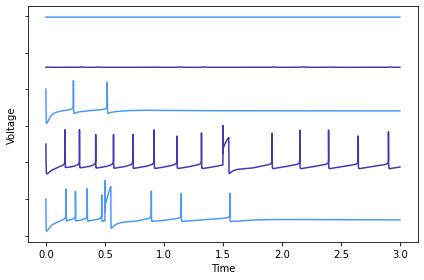

<Figure size 432x288 with 0 Axes>

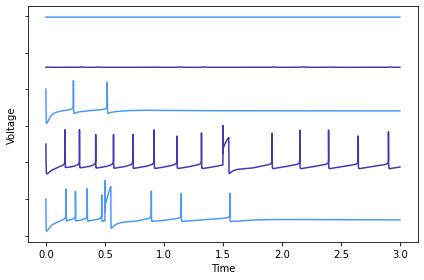

In [5]:
pt.plot_traces([x for x in pt.voltage])